In [1]:
import os
os.environ["DEVELOPMENT"] = '1'

from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent,IrrigationManagement
from aquacrop.utils import prepare_weather, get_filepath
import pandas as pd
import numpy as np

INFO:root:Running the simulation in development mode.


c:\Users\s10034cb\Dropbox (The University of Manchester)\Manchester Postdoc\aquacrop\aquacrop\solution\root_zone_water.py:4: NumbaPendingDeprecationWarning: The 'pycc' module is pending deprecation. Replacement technology is being developed.

Pending Deprecation in Numba 0.57.0. For more information please see: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-the-numba-pycc-module
  from numba.pycc import CC
INFO:root:"C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.35.32215\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD "-IC:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.35.32215\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.35.32215\ATLMFC\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Auxiliary\VS\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22000.0\ucrt" "-IC:\Program Files (x86)\W

## Soil fertility calibration

In [8]:
Rel=60
RedaCCx=77
CCx=96
stress=72#give the value shown in AquaCrop-windows interface for test

maize = Crop('MaizeGDDAQTEST', planting_date='05/01',soil_fert_stress=1,RelativeBio=Rel/100,Ksccx_in=RedaCCx/CCx,fcdecline_in=1, sfertstress=stress/100)

In [3]:
weather_file_path = get_filepath('cordaba_climate.txt')

In [4]:
IrrMethod=0
irrMet=IrrigationManagement(irrigation_method=IrrMethod)

In [9]:
model_os = AquaCropModel(
            sim_start_time=f'{1986}/05/01',
            sim_end_time=f'{1986}/08/30',
            weather_df=prepare_weather(weather_file_path),
            soil=Soil(soil_type='SandyLoam'),
            crop=maize,
            initial_water_content=InitialWaterContent(value=['FC']),
            irrigation_management=irrMet
        )

## run model

In [10]:
model_os.run_model(till_termination=True)
model_results = model_os.get_crop_growth()

loc_ = 73
Ksccx1 = 0.4816341964533126
Ksexpf1 = 0.5945329563728636
Kswp1 = 0.17730105834265242
fcdecline1 = 0.002994563929334058
Ksccx2 = 0.4816341964533126
Ksexpf2 = 0.7145329563728637
Kswp2 = 0.17730105834265242
fcdecline2 = 0.002994563929334058
sfertstress2 = 0.72


c:\Users\s10034cb\Dropbox (The University of Manchester)\Manchester Postdoc\aquacrop\aquacrop\solution\biomass_accumulation.py:136: RuntimeWarning: invalid value encountered in double_scalars
  BioAdj=FracBiomassPotSF+FracBiomassPotSF-NewCond_B/(Crop.Bio_top[NewCond_DAP]*WPadj)


C:\Users\s10034cb\AppData\Local\Temp\ipykernel_21796\495191262.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aq=pd.read_table('AquaCropV61Nr02052018\OUTP\maizeWinCrop.OUT',skiprows=4, skipfooter=31, delim_whitespace=True,encoding="latin1")


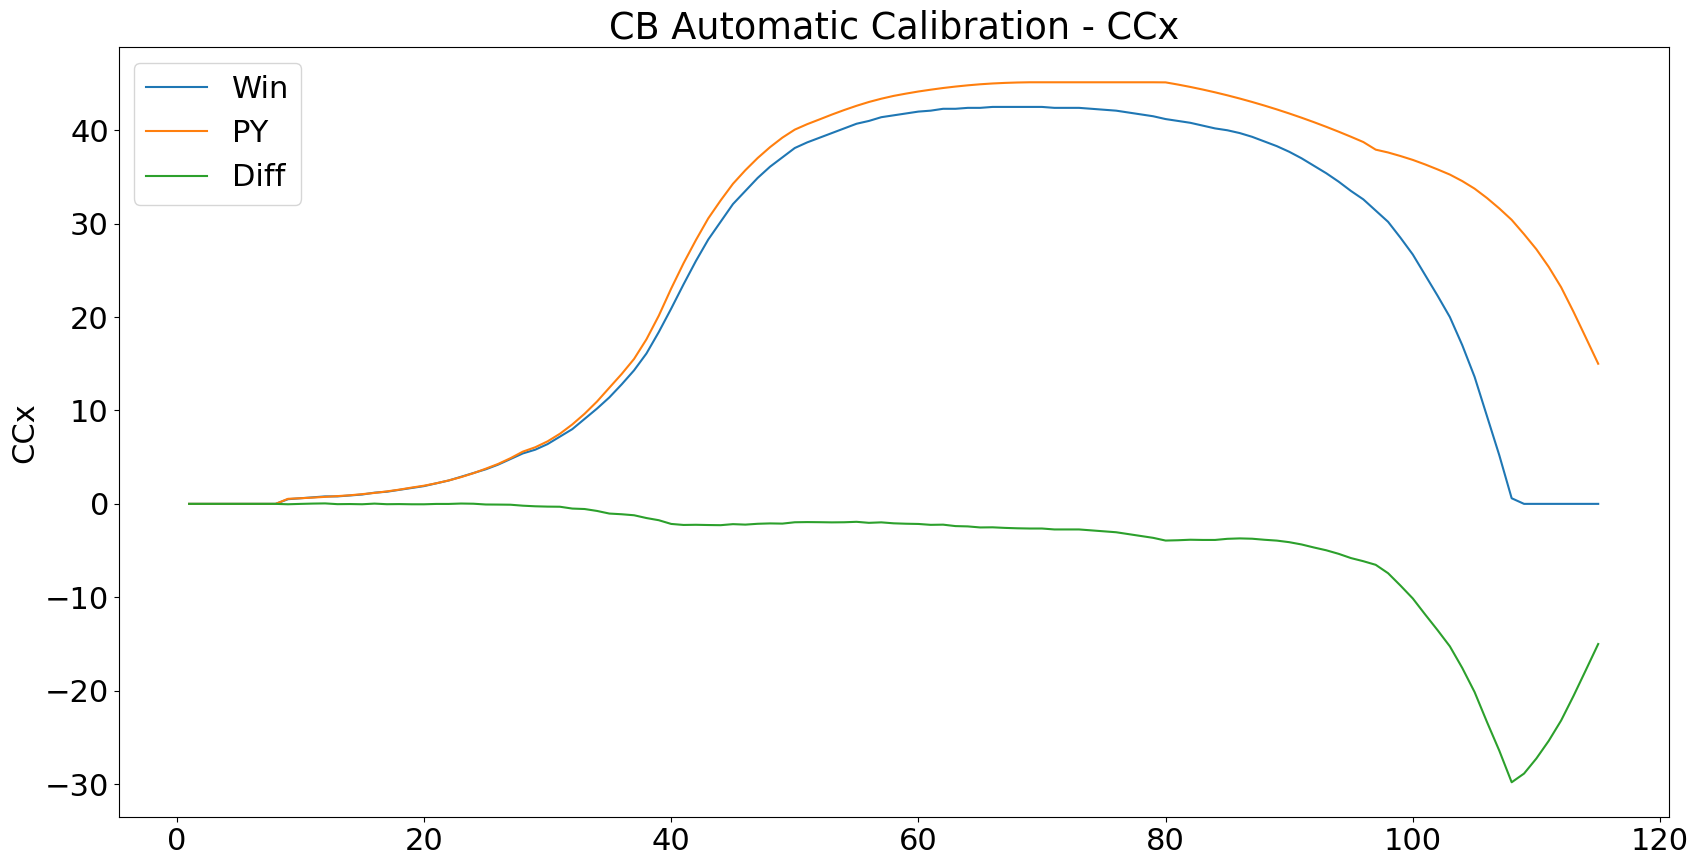

<Figure size 640x480 with 0 Axes>

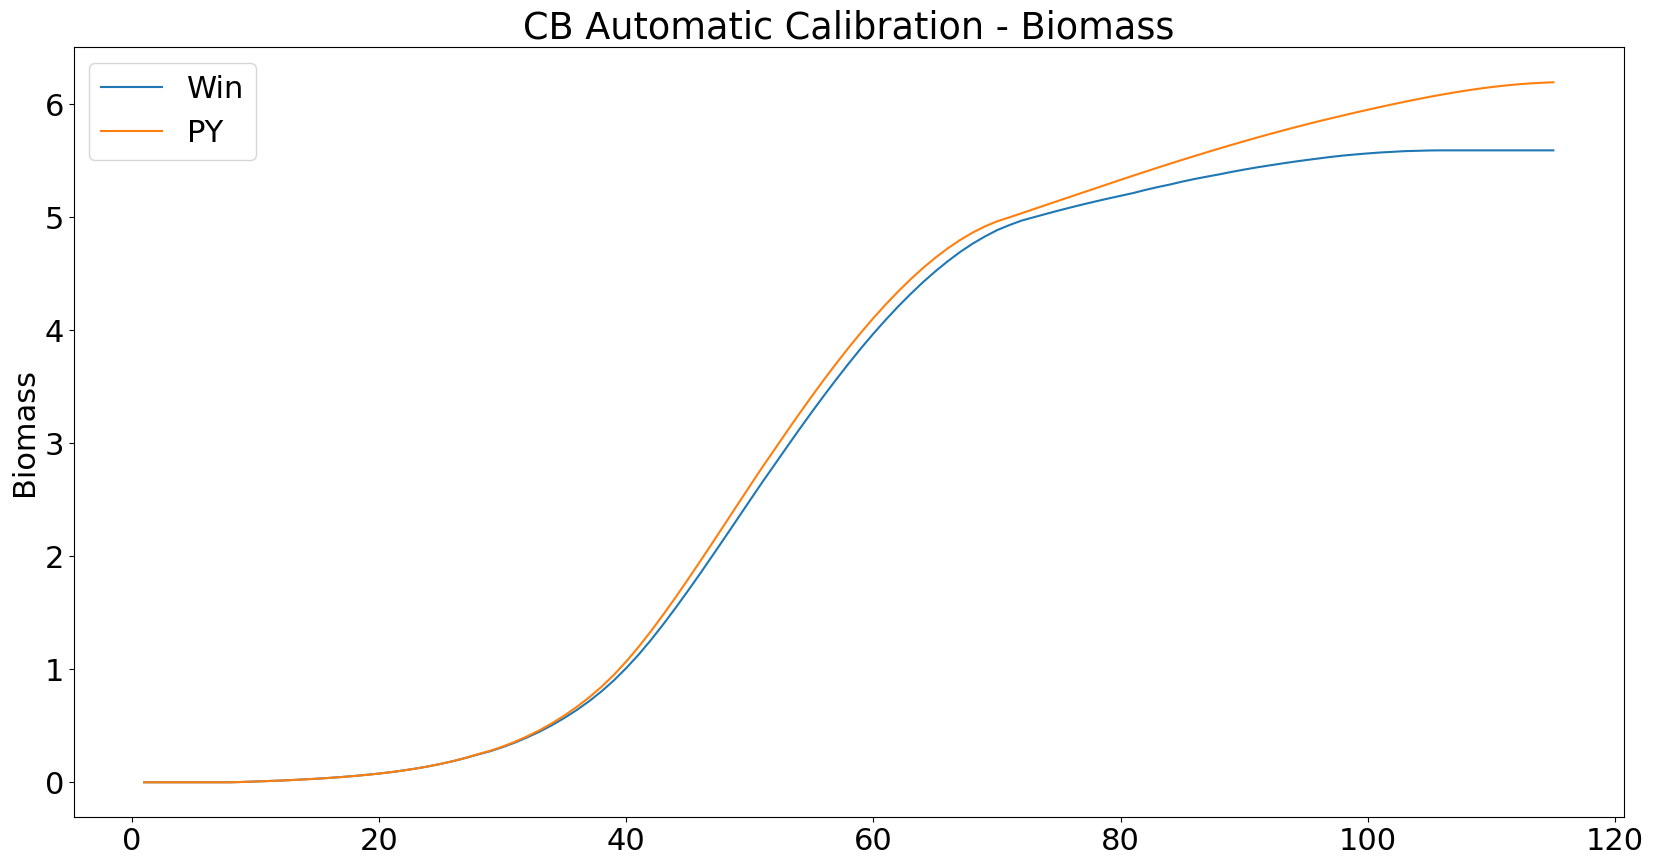

<Figure size 640x480 with 0 Axes>

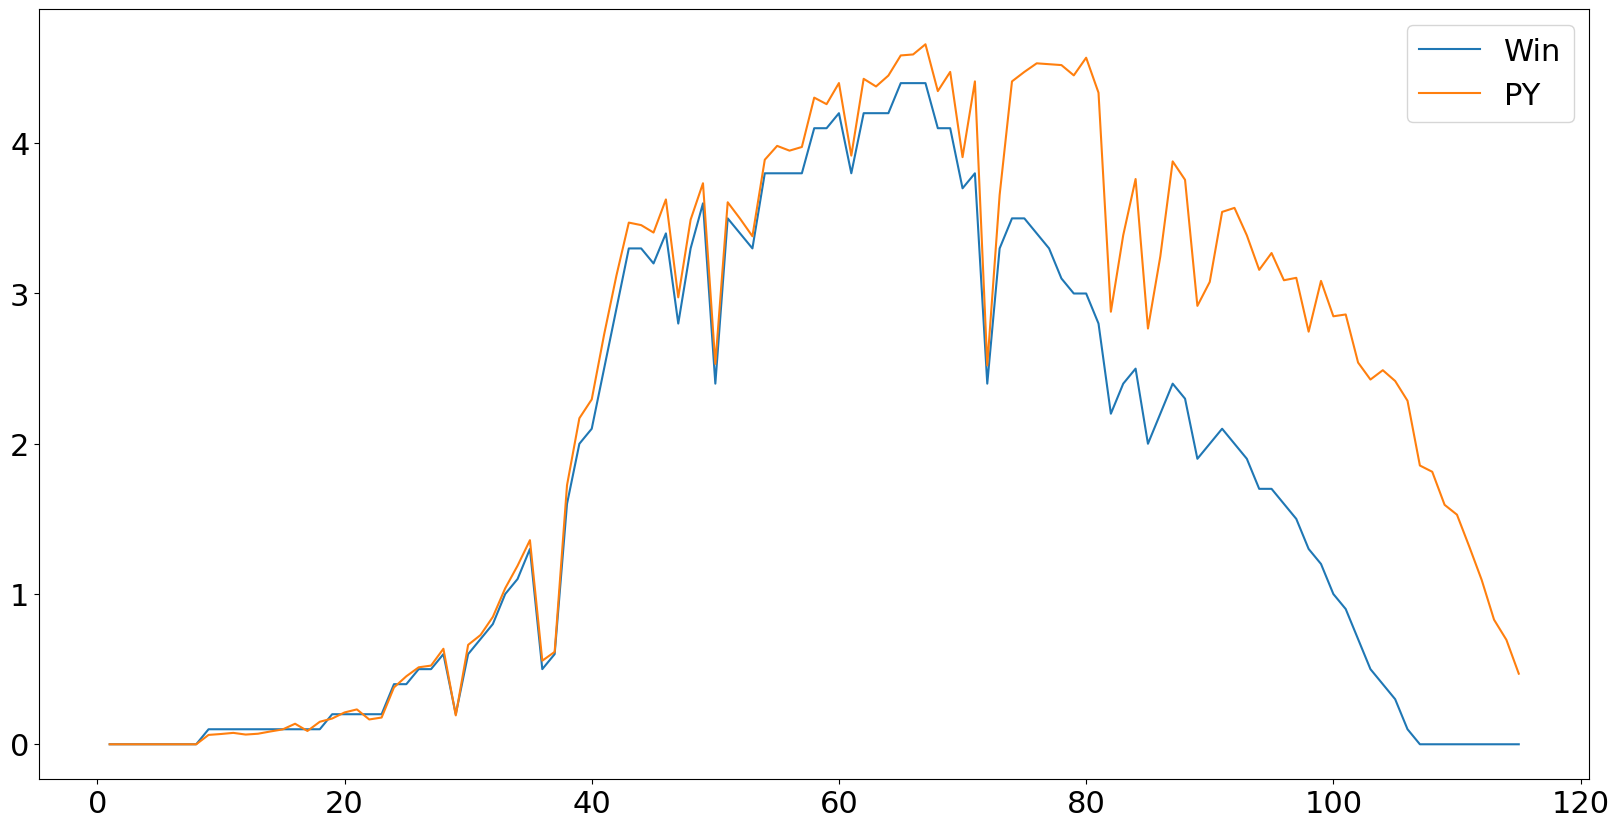

<Figure size 640x480 with 0 Axes>

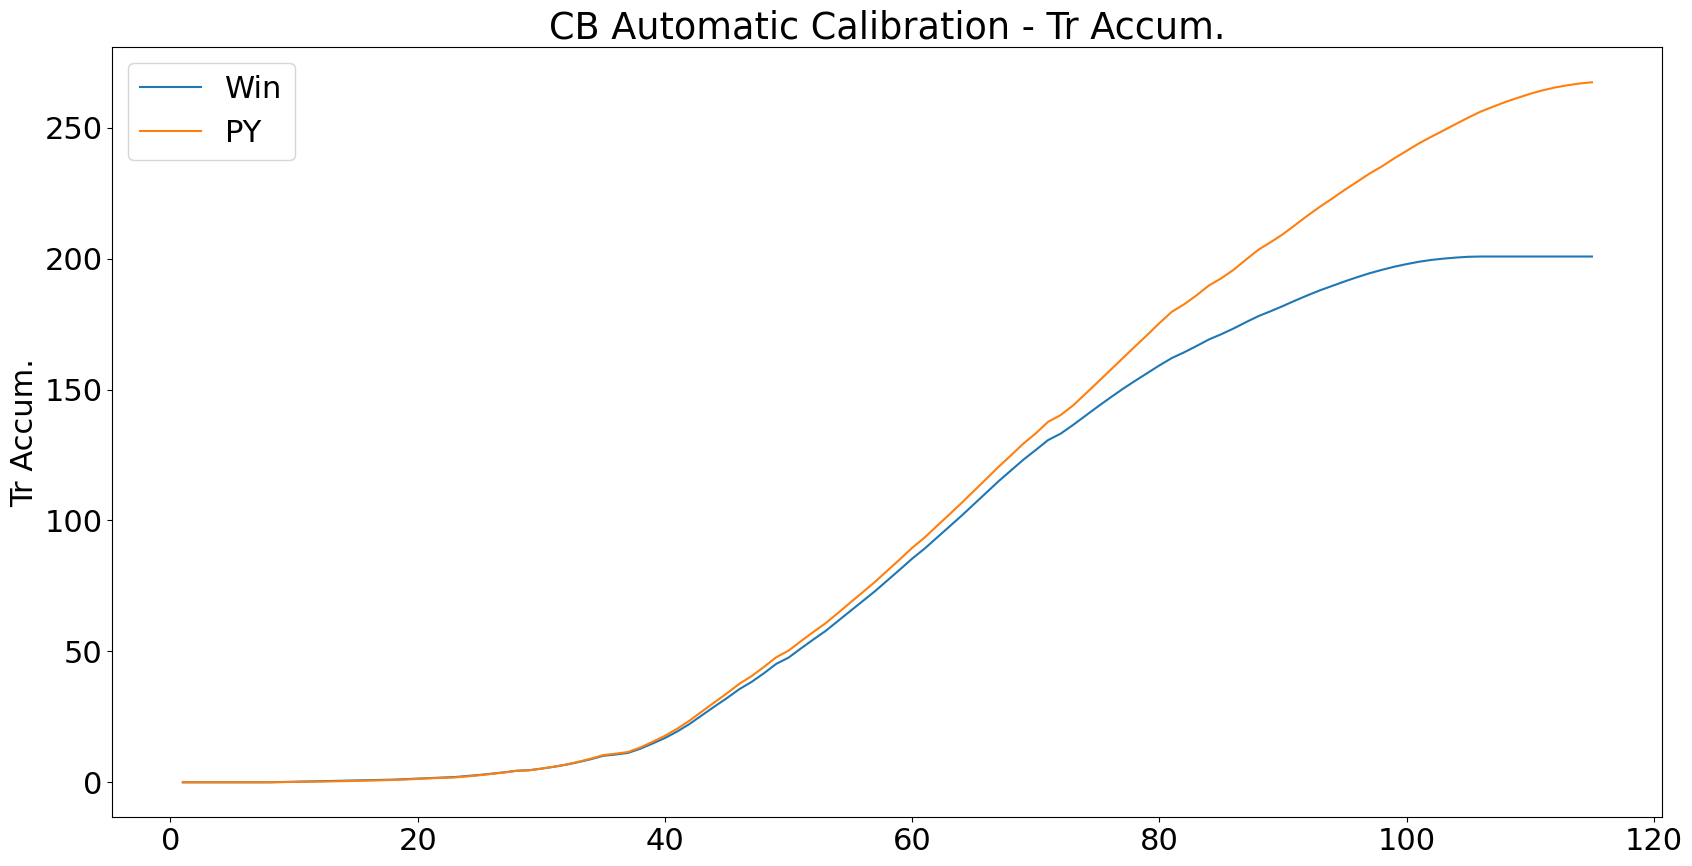

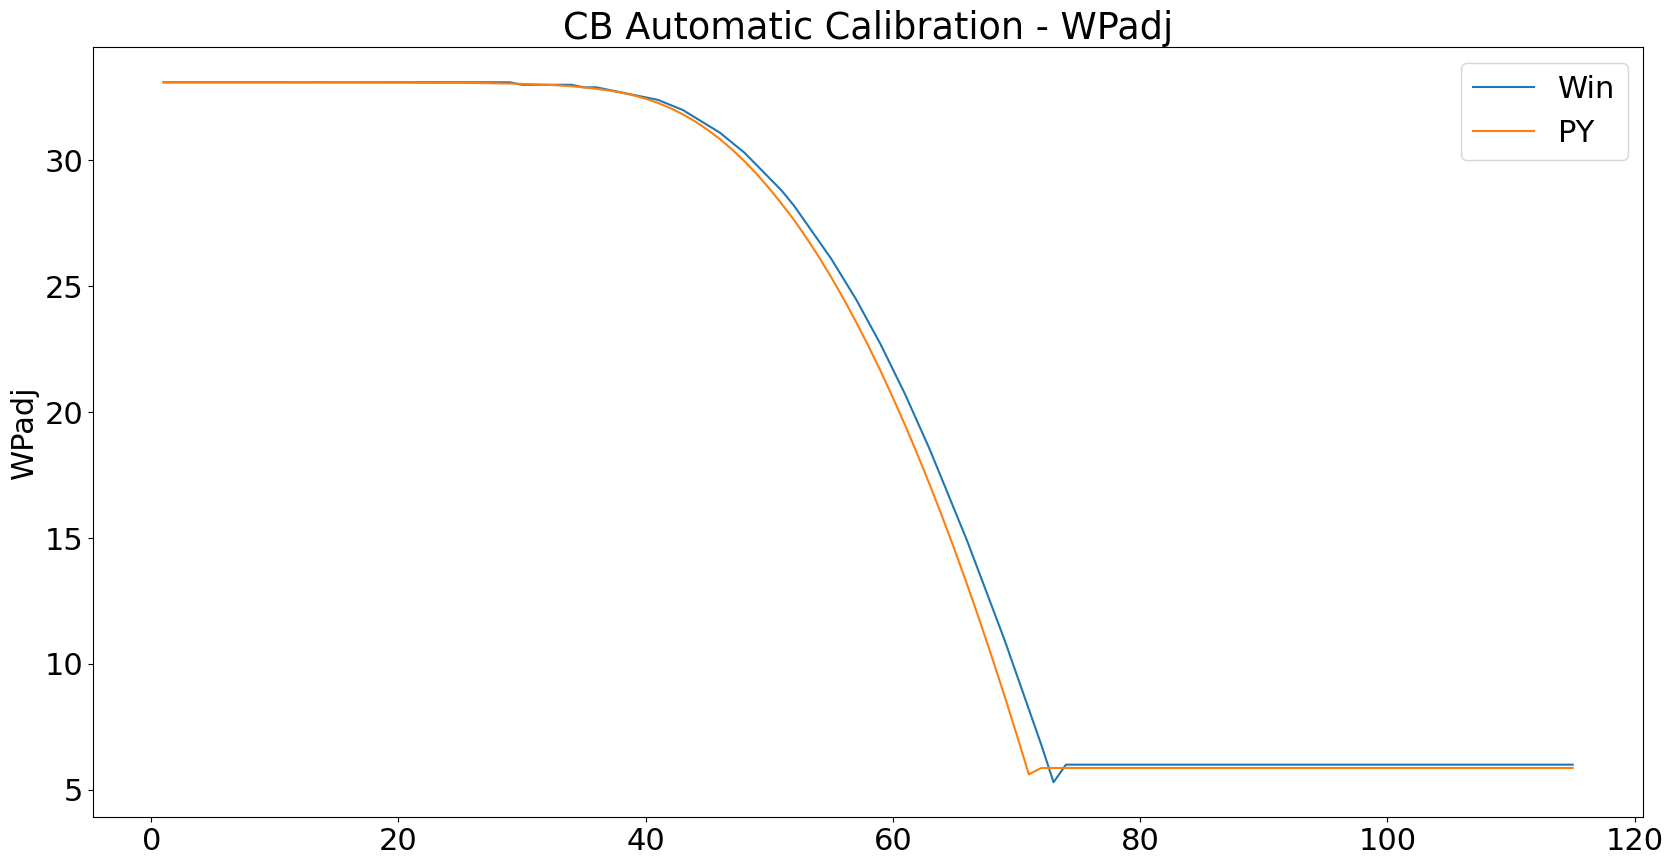

In [12]:
aq=pd.read_table('AquaCropV61Nr02052018\OUTP\maizeWinCrop.OUT',skiprows=4, skipfooter=31, delim_whitespace=True,encoding="latin1")
aq=aq.drop([0])

aq.to_csv('aq_temp.csv')

aq=pd.read_csv('aq_temp.csv')

import matplotlib.pyplot as plt

aq

time=np.array(range(1,len(aq.index)))
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,aq.loc[time,'CC'],label='Win')
plt.plot(time,model_results.loc[time,'canopy_cover']*100,label='PY')
plt.plot(time,aq.loc[time,'CC']-model_results.loc[time,'canopy_cover']*100,label='Diff')
plt.legend()
plt.ylabel('CCx')
plt.title('CB Automatic Calibration - CCx')
plt.savefig('test_figs\maize_CCx_irrmethod{0}_stress{1}.png'.format(IrrMethod,stress))
plt.show()

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,aq.loc[time,'Biomass'],label='Win')
plt.plot(time,model_results.loc[time,'biomass']/100,label='PY')
plt.legend()
plt.ylabel('Biomass')
plt.title('CB Automatic Calibration - Biomass')
plt.savefig('test_figs\maize_Biomass_irrmethod{0}_stress{1}.png'.format(IrrMethod,stress))
plt.show()

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,aq.loc[time,'Tr'],label='Win')
plt.plot(time,model_results.loc[time,'Tr'],label='PY')
plt.legend()

import itertools
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(time,list(itertools.accumulate(aq.loc[time,'Tr'])),label='Win')
plt.plot(time,list(itertools.accumulate(model_results.loc[time,'Tr'])),label='PY')
plt.legend()
plt.ylabel('Tr Accum.')
plt.title('CB Automatic Calibration - Tr Accum.')
plt.savefig('test_figs\maize_Traccum_irrmethod{0}_stress{1}.png'.format(IrrMethod,stress))
plt.show()

#time=range(1,175)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(time,aq.loc[time,'WP'],label='Win')
plt.plot(time,model_results.loc[time,'NewCond.WPadj'],label='PY')
plt.legend()
plt.ylabel('WPadj')
plt.title('CB Automatic Calibration - WPadj')
plt.savefig('test_figs\maize_WPadj_irrmethod{0}_stress{1}.png'.format(IrrMethod,stress))
plt.show()